Nama   : Irawansyah

Kelas : PEMROSESAN BAHASA ALAMI IF-41-GAB02

NIM   : 1301174689

**Tutorial Pekan keempat**

Membangun model **word2vec Skip-Gram** dengan library Gensim

- mengakses vektor/embedding kata

- mendapatkan nilai cosine similarity antar kata

- mendapatkan daftar kata dengan similarity tertinggi (N-top similarities)

- visualisasi word embedding


Sumber: https://radimrehurek.com/gensim/models/word2vec.html

Import library untuk menampilkan pesan log proses

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import glob
import os
import numpy as np

Import library gensim dan package yang dibutuhkan

Package datapath tidak digunakan di contoh ini. 

Jika akan menggunakan contoh data yang sudah ada di Gensim, gunakan package datapath.

Class MyCorpus bertujuan untuk memproses data teks yang akan digunakan sebagai sumber data latih membuat model word2vec.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path = 'drive/My Drive/Dataset'
Dataset = os.path.join(Path)

with open("Dataset.txt","w+") as outputfile:
    for filename in os.listdir(Dataset):
        with open(os.path.join(Dataset,filename),"r") as file:
            content = file.read()
            outputfile.write(content)

In [ ]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus(object): 
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        filename = "Dataset.txt"
        # corpus_path = 'drive/My Drive/test_code_2020/NLP/pekan_4/contoh_teks_w2v_gensim.txt' # sesuaikan dengan path masing-masing
        for line in open(filename):
            # assume there's one document per line, tokens separated by whitespace
            # asumsi 1 dokumen adalah 1 kalimat, dituliskan per baris. Antar token dipisahkan dengan spasi
            yield utils.simple_preprocess(line)

2020-10-14 12:57:13,826 : INFO : 'pattern' package not found; tag filters are not available for English
2020-10-14 12:57:13,839 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-14 12:57:13,839 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


Import package untuk membangun model

Panggil fungsi Word2Vec untuk membangun model word2vec, parameter berupa kalimat-kalimat korpus

Perhatikan bahwa setting yang digunakan adalah setting default, sepertiL min_count atau jumlah kemunculan kata = 5. Pada eksperimen yang berbeda, sesuaikan setting.

In [ ]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences,size = 100, min_count=1)

2020-10-14 12:57:13,850 : INFO : collecting all words and their counts
2020-10-14 12:57:13,855 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-14 12:57:13,883 : INFO : collected 3812 word types from a corpus of 24333 raw words and 312 sentences
2020-10-14 12:57:13,887 : INFO : Loading a fresh vocabulary
2020-10-14 12:57:13,939 : INFO : effective_min_count=1 retains 3812 unique words (100% of original 3812, drops 0)
2020-10-14 12:57:13,940 : INFO : effective_min_count=1 leaves 24333 word corpus (100% of original 24333, drops 0)
2020-10-14 12:57:13,954 : INFO : deleting the raw counts dictionary of 3812 items
2020-10-14 12:57:13,955 : INFO : sample=0.001 downsamples 54 most-common words
2020-10-14 12:57:13,956 : INFO : downsampling leaves estimated 20755 word corpus (85.3% of prior 24333)
2020-10-14 12:57:13,967 : INFO : estimated required memory for 3812 words and 100 dimensions: 4955600 bytes
2020-10-14 12:57:13,969 : INFO : resetting layer weights
20

Tes mengakses sebuah vektor, dengan fungsi wv, parameter berupa kata.

Coba tes dengan kata-kata yang tidak pernah muncul di korpus, apa yang terjadi?

Kemudian berapa panjang embedding-nya? Setting panjang embedding yang digunakan di contoh ini juga setting default.

In [ ]:
vec_positif = model.wv['covid']
print(vec_positif)

[ 0.28922394  0.31365943 -0.45084956  0.15036564 -0.15155439 -0.3200764
  0.58655334  0.06447885 -0.5772228   0.16196154 -0.20199992  0.86897516
 -0.5686483   0.22410831 -0.15071024  0.20845893 -0.51350784  0.6308682
  0.2971287  -0.67737806  0.0934433   0.24973103 -0.592605   -0.39623776
  0.03372517 -0.04010909 -0.34809873 -0.46496406 -0.21925227 -0.08522454
  0.20308742 -0.16323332 -0.03922995 -0.549131    0.1826409  -0.669974
  0.2658744  -0.00461986 -0.5255522   0.10039018  0.12185021 -0.22300903
  0.09170914  0.5094627  -0.1694563   0.3895452   0.05969986  0.53724945
  0.07038725  0.2810959   0.10661396  0.0132287  -0.5016978  -0.33645105
 -0.2871117  -0.28477994  0.6309997   0.0262686   0.6223264   0.31715554
 -0.48327747  0.13773248  0.00605237 -0.18371572 -0.20005222  0.07285272
  0.12181243  0.03708332  0.76129514  0.7811379   0.11801158  0.35578015
  0.13796629 -0.10718533 -0.00824278 -0.17290768 -0.06111373  0.04883865
 -0.15171938 -0.13768077  0.10689959  0.02378752  0.118

In [ ]:
np.shape(vec_positif)

(100,)

Periksa 5 kata yang similarity-nya paling tinggi dengan sebuah kata. 

Perhitungan similarity apa yang digunakan sebagai default di Gensim?

Tes nilai similarity antar 2 kata

In [ ]:
print(model.wv.most_similar(positive=['positif'], topn=5))

2020-10-14 12:57:15,012 : INFO : precomputing L2-norms of word weight vectors


[('di', 0.9998716115951538), ('kasus', 0.9998641610145569), ('yang', 0.9998635053634644), ('covid', 0.9998551607131958), ('dari', 0.9998520016670227)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.similarity('pemerintah','corona'))

0.9997932


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.similarity('vaksin','corona'))

0.99983054


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.similarity('masyarakat','jakarta'))

0.999783


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.most_similar(positive=['covid'], topn=5))

[('yang', 0.9999521970748901), ('dan', 0.9999505877494812), ('dengan', 0.9999473094940186), ('akan', 0.999931812286377), ('di', 0.9999316930770874)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.most_similar(positive=['jakarta'], topn=5))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dan', 0.9998534321784973), ('di', 0.9998509287834167), ('kata', 0.9998445510864258), ('akan', 0.9998432397842407), ('dengan', 0.9998422861099243)]


In [ ]:
print(model.wv.most_similar(positive=['pemerintah'], topn=5))

[('di', 0.9999016523361206), ('dan', 0.9999012351036072), ('pada', 0.9999009370803833), ('yang', 0.9998890161514282), ('ke', 0.9998867511749268)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Persiapan visualisasi embeddings, import library yang diperlukan

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

Fungsi untuk reduksi dimensi, supaya lebih mudah dimengerti.

Pada contoh, dimensi vektor direduksi menjadi 2.

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


Lakukan proses reduksi dimensi

In [ ]:
x_vals, y_vals, labels = reduce_dimensions(model)

Coba tampilkan dengan plotly. Image akan disimpan sebagai file .html.

Perhatikan path penyimpanan file, sesuaikan dengan komputer/drive masing-masing.

In [ ]:
def plot_with_plotly(x_vals, y_vals, labels):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]
    
    plot(data, filename='drive/My Drive/Colab Notebooks/Dataset/word-embedding-plot.html')


In [ ]:
plot_with_plotly(x_vals,y_vals,labels)

Fungsi untuk visualisasi dengan matplotlib

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


Tes plot dengan matplotlib

Text(0.5, 1.0, 'Min_count = 1')

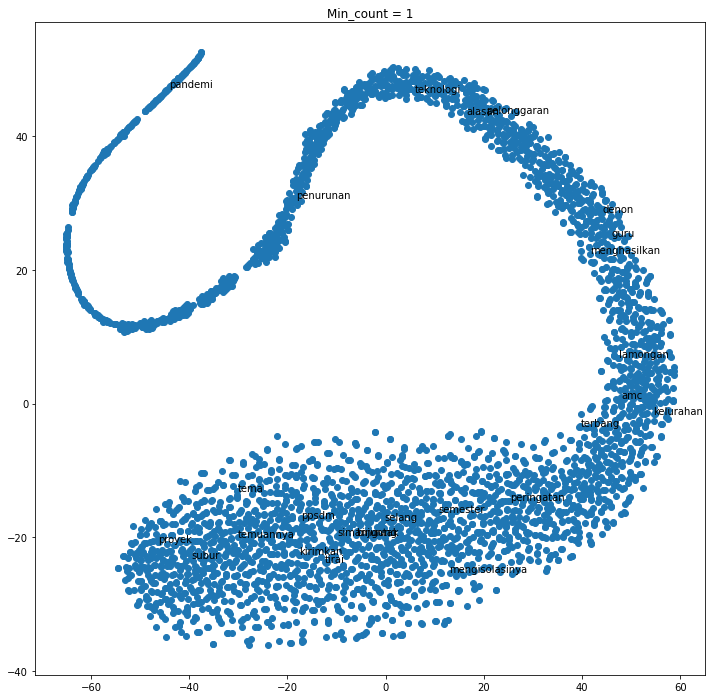

In [ ]:
import matplotlib.pyplot as plt
plot_with_matplotlib(x_vals, y_vals, labels)
plt.title("Min_count = 1")

# Model 2 dimana min_count = 5

Import package untuk membangun model

Panggil fungsi Word2Vec untuk membangun model word2vec, parameter berupa kalimat-kalimat korpus

Perhatikan bahwa setting yang digunakan adalah setting default, sepertiL min_count atau jumlah kemunculan kata = 5. Pada eksperimen yang berbeda, sesuaikan setting.

In [22]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences,size = 100, min_count=5)

2020-10-14 13:28:04,675 : INFO : collecting all words and their counts
2020-10-14 13:28:04,677 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-14 13:28:04,713 : INFO : collected 3812 word types from a corpus of 24333 raw words and 312 sentences
2020-10-14 13:28:04,714 : INFO : Loading a fresh vocabulary
2020-10-14 13:28:04,720 : INFO : effective_min_count=5 retains 899 unique words (23% of original 3812, drops 2913)
2020-10-14 13:28:04,720 : INFO : effective_min_count=5 leaves 19507 word corpus (80% of original 24333, drops 4826)
2020-10-14 13:28:04,729 : INFO : deleting the raw counts dictionary of 3812 items
2020-10-14 13:28:04,729 : INFO : sample=0.001 downsamples 67 most-common words
2020-10-14 13:28:04,730 : INFO : downsampling leaves estimated 15295 word corpus (78.4% of prior 19507)
2020-10-14 13:28:04,733 : INFO : estimated required memory for 899 words and 100 dimensions: 1168700 bytes
2020-10-14 13:28:04,733 : INFO : resetting layer weights


Tes mengakses sebuah vektor, dengan fungsi wv, parameter berupa kata.

Coba tes dengan kata-kata yang tidak pernah muncul di korpus, apa yang terjadi?

Kemudian berapa panjang embedding-nya? Setting panjang embedding yang digunakan di contoh ini juga setting default.

In [23]:
vec_positif = model.wv['covid']
print(vec_positif)

[ 0.35276854  0.28298452 -0.48434106  0.20892495 -0.08275152 -0.51659137
  0.5495379   0.04600057 -0.9030283   0.263558   -0.16316102  1.2187335
 -0.67125636  0.03081998 -0.1683466   0.10639236 -0.62544584  0.7386577
  0.36899188 -0.53658295  0.07768735  0.32070884 -0.58006316 -0.44428518
  0.22070138 -0.08169428 -0.40921476 -0.58205694 -0.34174064 -0.26027617
  0.06529167 -0.44196263  0.03659781 -0.63192016  0.17569384 -0.77974784
  0.25427294  0.20746177 -0.5014332   0.04405181  0.05814064 -0.34767535
  0.13279924  0.5230738  -0.24471463  0.47055876 -0.03442214  0.87062186
 -0.18592583  0.07998727  0.2648435   0.13162348 -0.57263315 -0.49423268
 -0.31795162 -0.17445585  0.8001803  -0.14122763  0.48523104  0.3291617
 -0.72325754  0.05060219  0.34463784 -0.11068175 -0.3578359   0.05756868
  0.18872626  0.13669431  0.8671354   0.8354314   0.19900392  0.31357726
  0.30316603 -0.1131751  -0.02332059  0.23904848 -0.04977218  0.03137538
 -0.5032374   0.09483157  0.29900625  0.06944838 -0.08

In [24]:
np.shape(vec_positif)

(100,)

Periksa 5 kata yang similarity-nya paling tinggi dengan sebuah kata.

Perhitungan similarity apa yang digunakan sebagai default di Gensim?

In [25]:
print(model.wv.most_similar(positive=['positif'], topn=5))

2020-10-14 13:29:18,092 : INFO : precomputing L2-norms of word weight vectors


[('di', 0.9999184608459473), ('hingga', 0.9999099373817444), ('kasus', 0.9999080896377563), ('covid', 0.9999067783355713), ('yang', 0.9999057650566101)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



Tes nilai similarity antar 2 kata

In [26]:
print(model.wv.similarity('pemerintah','corona'))

0.99987453


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [27]:
print(model.wv.similarity('vaksin','corona'))

0.9998971


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [28]:
print(model.wv.similarity('masyarakat','jakarta'))

0.9998871


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [29]:
print(model.wv.most_similar(positive=['covid'], topn=5))

[('yang', 0.9999622106552124), ('dengan', 0.9999610185623169), ('dan', 0.9999597668647766), ('akan', 0.9999531507492065), ('tidak', 0.9999496936798096)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [30]:
print(model.wv.most_similar(positive=['jakarta'], topn=5))

[('dan', 0.9999205470085144), ('di', 0.9999187588691711), ('akan', 0.9999154806137085), ('kata', 0.9999152421951294), ('melakukan', 0.9999145269393921)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [31]:
print(model.wv.most_similar(positive=['pemerintah'], topn=5))

[('pada', 0.9999227523803711), ('dan', 0.9999213814735413), ('di', 0.9999204277992249), ('dengan', 0.9999160170555115), ('dalam', 0.9999129176139832)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



Lakukan proses reduksi dimensi

In [32]:
x_vals, y_vals, labels = reduce_dimensions(model)

In [33]:
plot_with_plotly(x_vals,y_vals,labels)

Tes plot dengan matplotlib

Text(0.5, 1.0, 'Min_count = 5')

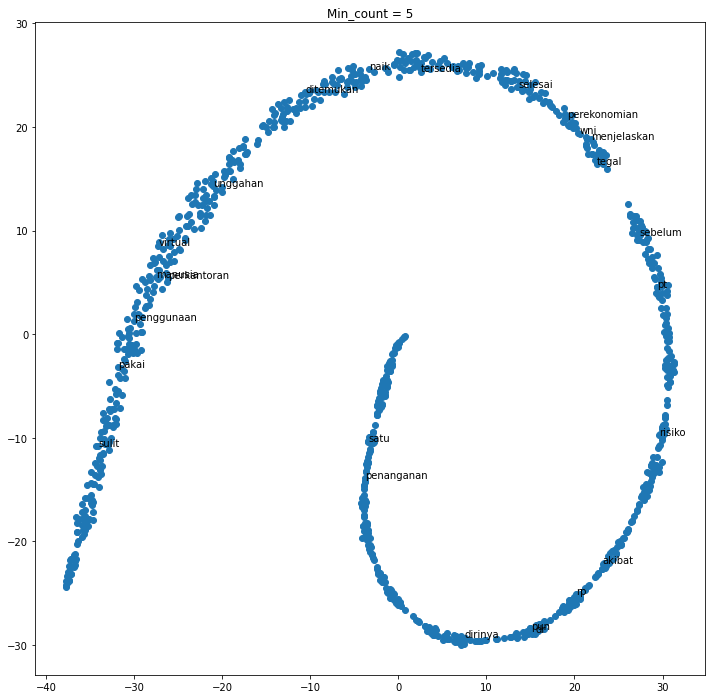

In [35]:
import matplotlib.pyplot as plt
plot_with_matplotlib(x_vals, y_vals, labels)
plt.title("Min_count = 5")